In [90]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
import input
import util

In [92]:
def geo_data_to_dataframe():
    file_path = 'data/postesSynop.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, sep=';')
        df = df.dropna(axis=1, how='all')  # Drop columns where all values are NaN
        return df
    else:
        print(f"File {file_path} does not exist.")
        return None
    
donnees_geo = geo_data_to_dataframe()
print(donnees_geo)

       ID               Nom   Latitude   Longitude  Altitude
0    7005         ABBEVILLE  50.136000    1.834000        69
1    7015     LILLE-LESQUIN  50.570000    3.097500        47
2    7020   PTE DE LA HAGUE  49.725167   -1.939833         6
3    7027    CAEN-CARPIQUET  49.180000   -0.456167        67
4    7037        ROUEN-BOOS  49.383000    1.181667       151
..    ...               ...        ...         ...       ...
57  81401     SAINT LAURENT   5.485500  -54.031667         5
58  81405   CAYENNE-MATOURY   4.822333  -52.365333         4
59  81408     SAINT GEORGES   3.890667  -51.804667         6
60  81415       MARIPASOULA   3.640167  -54.028333       106
61  89642  DUMONT D'URVILLE -66.663167  140.001000        43

[62 rows x 5 columns]


In [93]:
station_proche = util.trouver_station_proche(input.LAT_GILATS, input.LON_GILATS, donnees_geo)
print(f'Station proche: {station_proche}')
station_id = station_proche["ID"]
print(f'ID de la station proche: {station_id}')

Station proche: ID                      7168
Nom          TROYES-BARBEREY
Latitude           48.324667
Longitude               4.02
Altitude                 112
Name: 11, dtype: object
ID de la station proche: 7168


In [94]:
def weather_data_to_dataframe(start_year, end_year):
    dataframes = []
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            date_str = f"{year}{month:02d}"
            file_path = os.path.join('data/synop', f"synop.{date_str}.csv")
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, sep=';')
                df = df[df['numer_sta'] == station_id]  # Only keep rows where station ID is station_id
                dataframes.append(df)
    dataframe = pd.concat(dataframes)
    dataframe = dataframe.dropna(axis=1, how='all')  # Drop any empty rows
    # dataframe = dataframe.drop(columns=['numer_sta'])  # Drop the 'numer_sta' column
    dataframe = dataframe.reset_index(drop=True)  # Reset the index
    return dataframe
    

donnees_meteo = weather_data_to_dataframe(input.START_YEAR, input.END_YEAR)
print(donnees_meteo)

      numer_sta            date    pmer tend cod_tend   dd        ff  \
0          7168  20100101000000   99360    0        5  350  3.600000   
1          7168  20100101030000   99300  -60        6  360  4.100000   
2          7168  20100101060000   99350   50        3  350  4.600000   
3          7168  20100101090000   99630  270        3  350  5.100000   
4          7168  20100101120000   99830  200        1  330  5.100000   
...         ...             ...     ...  ...      ...  ...       ...   
31844      7168  20201231090000  100250   20        2  190  5.800000   
31845      7168  20201231120000  100170  -70        8  190  3.700000   
31846      7168  20201231150000  100360  180        3  310  5.800000   
31847      7168  20201231180000  100540  170        1  320  3.700000   
31848      7168  20201231210000  100670  120        1  260  3.400000   

                t          td   u  ... hnuage1 nnuage2 ctype2 hnuage2 nnuage3  \
0      275.250000  274.850000  97  ...      mq      mq

In [95]:
# Convertir la colonne 'date' en datetime
donnees_meteo['date'] = pd.to_datetime(donnees_meteo['date'], format='%Y%m%d%H%M%S')

# Définir 'date' comme index et trier le DataFrame par cet index
donnees_meteo = donnees_meteo.set_index('date').sort_index()

print(donnees_meteo)

                    numer_sta    pmer tend cod_tend   dd        ff  \
date                                                                 
2010-01-01 00:00:00      7168   99360    0        5  350  3.600000   
2010-01-01 03:00:00      7168   99300  -60        6  360  4.100000   
2010-01-01 06:00:00      7168   99350   50        3  350  4.600000   
2010-01-01 09:00:00      7168   99630  270        3  350  5.100000   
2010-01-01 12:00:00      7168   99830  200        1  330  5.100000   
...                       ...     ...  ...      ...  ...       ...   
2020-12-31 09:00:00      7168  100250   20        2  190  5.800000   
2020-12-31 12:00:00      7168  100170  -70        8  190  3.700000   
2020-12-31 15:00:00      7168  100360  180        3  310  5.800000   
2020-12-31 18:00:00      7168  100540  170        1  320  3.700000   
2020-12-31 21:00:00      7168  100670  120        1  260  3.400000   

                              t          td   u     vv  ... hnuage1 nnuage2  \
date      

In [96]:
# remplacer les données manquantes par 0
donnees_meteo['rr3']=donnees_meteo['rr3'].replace('mq','0')
donnees_meteo['rr3']=donnees_meteo['rr3'].astype('float')

# Ne garder que la colonne des précipitations des 3 dernieres heures
precipitations = donnees_meteo['rr3']
print(precipitations)

# Certaines données sont négatives, je sais pas pourquoi.
# Pour l'instant je les garde mais à investiguer.

date
2010-01-01 00:00:00    0.0
2010-01-01 03:00:00    0.0
2010-01-01 06:00:00    0.0
2010-01-01 09:00:00    0.0
2010-01-01 12:00:00    0.0
                      ... 
2020-12-31 09:00:00   -0.1
2020-12-31 12:00:00    0.2
2020-12-31 15:00:00    0.6
2020-12-31 18:00:00    0.0
2020-12-31 21:00:00    0.0
Name: rr3, Length: 31849, dtype: float64


In [109]:
# Extraire l'année, le jour et le mois de l'index datetime
donnees_meteo['annee'] = donnees_meteo.index.year
donnees_meteo['mois'] = donnees_meteo.index.month
donnees_meteo['jour'] = donnees_meteo.index.day


# Calculer la somme des précipitations pour chaque année, jour et mois
total_precipitations = donnees_meteo.groupby(['annee', 'mois', 'jour'])['rr3'].sum()

print(total_precipitations)

# Calculer la moyenne des précipitations pour chaque jour et mois
moyenne_precipitations = total_precipitations.groupby(['mois', 'jour']).mean()
# Reset the index so jour and mois are columns
moyenne_precipitations = moyenne_precipitations.reset_index()

print(moyenne_precipitations)

annee  mois  jour
2010   1     1       0.0
             2       0.0
             3       0.0
             4       0.0
             5       0.0
                    ... 
2020   12    27      5.9
             28      7.8
             29      4.1
             30      1.0
             31      1.5
Name: rr3, Length: 3987, dtype: float64
     mois  jour       rr3
0       1     1  1.363636
1       1     2  1.181818
2       1     3  1.781818
3       1     4  3.145455
4       1     5  1.272727
..    ...   ...       ...
361    12    27  4.354545
362    12    28  1.536364
363    12    29  1.363636
364    12    30  1.072727
365    12    31  0.727273

[366 rows x 3 columns]


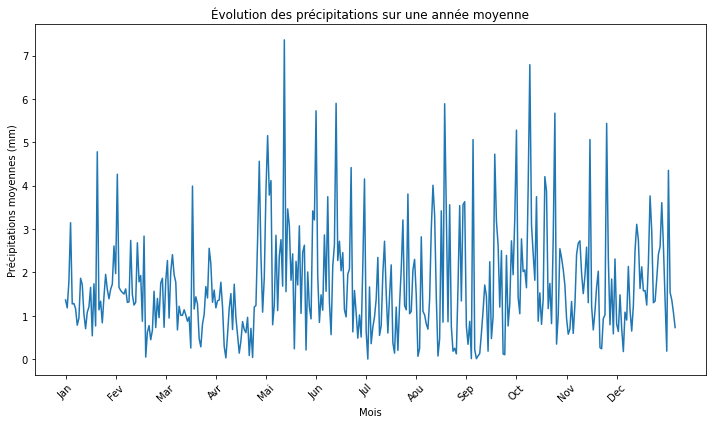

In [110]:
plt.figure(figsize=(10, 6))
# Create a 'date' column
moyenne_precipitations['date'] = moyenne_precipitations['mois'].astype(str) + '-' + moyenne_precipitations['jour'].astype(str)
plt.plot(moyenne_precipitations['date'], moyenne_precipitations['rr3'])

# Définir les positions et les labels de l'axe des abscisses
positions = np.arange(0, 12) * 30  # Positions approximatives du début de chaque mois
labels = ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(positions, labels, rotation=45)

plt.xlabel('Mois')
plt.ylabel('Précipitations moyennes (mm)')
plt.title('Évolution des précipitations sur une année moyenne')
plt.tight_layout()
plt.show()

In [114]:
nb_foyers = 4
surface_toit = 60
rendement_recuperation = 0.9

# Le calcul est le bon car 1 mm = 10^-3 m mais 1 m^3 = 1000 L
moyenne_precipitations['precipitations_litres'] = moyenne_precipitations['rr3'] * nb_foyers * surface_toit * rendement_recuperation

In [115]:
nb_personnes_foyer = 5
consommation_hygiene = 15  # (L/personne/jour)
consommation_menage = 10  # (L/personne/jour)
consommation_totale = nb_foyers * nb_personnes_foyer * (consommation_hygiene + consommation_menage)


# Ajouter une colonne "besoin"
moyenne_precipitations['besoin'] = consommation_totale

# Ajouter une colonne "exces_deficit" qui est la différence entre les précipitations reçues et le besoin
moyenne_precipitations['exces_deficit'] = moyenne_precipitations['precipitations_litres'] - moyenne_precipitations['besoin']

print(moyenne_precipitations)

     mois  jour       rr3   date  precipitations_litres  besoin  exces_deficit
0       1     1  1.363636    1-1             294.545455     500    -205.454545
1       1     2  1.181818    1-2             255.272727     500    -244.727273
2       1     3  1.781818    1-3             384.872727     500    -115.127273
3       1     4  3.145455    1-4             679.418182     500     179.418182
4       1     5  1.272727    1-5             274.909091     500    -225.090909
..    ...   ...       ...    ...                    ...     ...            ...
361    12    27  4.354545  12-27             940.581818     500     440.581818
362    12    28  1.536364  12-28             331.854545     500    -168.145455
363    12    29  1.363636  12-29             294.545455     500    -205.454545
364    12    30  1.072727  12-30             231.709091     500    -268.290909
365    12    31  0.727273  12-31             157.090909     500    -342.909091

[366 rows x 7 columns]


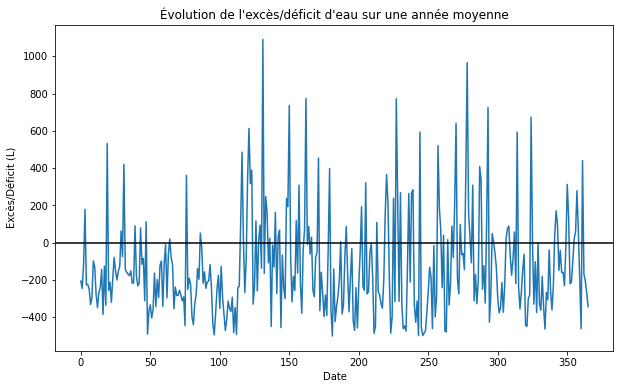

In [118]:
# Créer le graphique
plt.figure(figsize=(10, 6))
moyenne_precipitations['exces_deficit'].plot(kind='line')

# Ajouter une ligne horizontale au niveau 0
plt.axhline(0, color='black')

plt.xlabel('Date')
plt.ylabel('Excès/Déficit (L)')
plt.title('Évolution de l\'excès/déficit d\'eau sur une année moyenne')
plt.show()

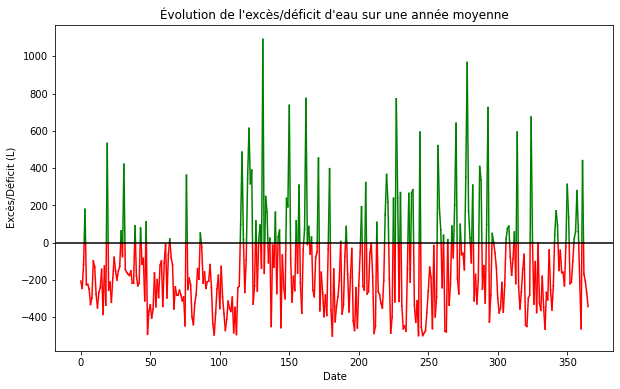

In [120]:
plt.figure(figsize=(10, 6))

# Obtenir les valeurs de 'exces_deficit' et leurs indices
values = moyenne_precipitations['exces_deficit'].values
indices = moyenne_precipitations['exces_deficit'].index

# Tracer chaque segment individuellement
i = 0
while i < len(values) - 1:
    # Si le segment passe à travers zéro, le diviser en deux au point zéro
    if values[i] * values[i+1] < 0:
        # Calculer l'indice du point zéro en utilisant l'interpolation linéaire
        zero_index = indices[i] - values[i] * (indices[i+1] - indices[i]) / (values[i+1] - values[i])
        
        # Tracer le premier segment
        color = 'g' if values[i] >= 0 else 'r'
        plt.plot([indices[i], zero_index], [values[i], 0], color=color)
        
        # Tracer le deuxième segment
        color = 'g' if values[i+1] > 0 else 'r'
        plt.plot([zero_index, indices[i+1]], [0, values[i+1]], color=color)
    else:
        # Tracer le segment
        color = 'g' if values[i] >= 0 else 'r'
        plt.plot(indices[i:i+2], values[i:i+2], color=color)
    
    i += 1

# Ajouter une ligne horizontale au niveau 0
plt.axhline(0, color='black')

plt.xlabel('Date')
plt.ylabel('Excès/Déficit (L)')
plt.title('Évolution de l\'excès/déficit d\'eau sur une année moyenne')
plt.show()

In [ ]:
'''
Reste à faire :
- écart-type de la moyenne pour voir si c'est bien comme estimation ?
- voir pourquoi il y a des données négatives
- ajuster selon l'évolution 2050 : y aura sûrement moins de précipitations
http://wiki.lowtechlab.org/wiki/Dimensionner_la_r%C3%A9cup%C3%A9ration_d%27eau_de_pluie_pour_%C3%AAtre_autonome
'''
